<a href="https://colab.research.google.com/github/teodorapopovic311/PPPO-Detection-Teodora-Popovic-IT28-2020/blob/main/Projekat_PPPO_Teodora_Popovic_IT28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika**

### Tema projekta:
 *Detekcija godina, pola i emocija*

**TEORIJSKI DEO PROJEKTA**

Računarski vid, kao grana veštačke inteligencije, omogućava računarima da automatski tumače i razumeju vizuelne informacije. U okviru ove discipline, detekcija i analiza ljudskog lica predstavlja jedan od najkrucijalnijih i najintenzivnije razvijanih zadataka. Osnovna svrha ove tehnologije je automatsko pronalaženje, lociranje i detaljna interpretacija lica u digitalnim zapisima, poput fotografija i video snimaka.

Sam proces detekcije lica obično se sastoji od nekoliko uzastopnih faza. Prvi korak podrazumeva tačnu lokalizaciju lica na slici i njegovo označavanje okvirom (bounding box). Zatim sledi procena položaja i orijentacije glave, nakon čega se vrši precizno mapiranje ključnih facijalnih tačaka (landmarks), kao što su položaj očiju, nosa, usta i obrisa lica. Iako je ljudska percepcija vešta u ovome, automatizacija ovog procesa suočava se sa brojnim izazovima. Ti izazovi uključuju velike varijacije u uslovima osvetljenja, složene pozadine, prisustvo senki, kao i ogromnu raznolikost u facijalnoj ekspresiji, pozama i prisustvu prepreka kao što su naočare ili brada.

Dalja, dublja analiza prepoznatog lica otvara vrata ka ekstrakciji bogatih informacija. Procena starosne dobi, prepoznavanje pola i klasifikacija emocionalnog stanja postaju sve važniji zadaci u savremenim aplikacijama. Njihov značaj raste u oblastima kao što su interakcija čovek-računar, pametni video nadzor, personalizovani marketing, robotska percepcija, kao i u biomedicinskim istraživanjima. Razumevanje ovih atributa omogućava kreiranje intuitivnijih i prilagodljivijih digitalnih sistema.

U praktičnoj realizaciji ovakvih projekata, korišćenje odgovarajućeg skupa podataka (dataset) je od ključnog značaja. Za potrebe ove analize koristiće se skup koji sadrži anotirane fotografije lica osoba različitih starosnih grupa, što omogućava da se problem modeluje kao zadatak nadgledanog mašinskog učenja.

Osnovni alat za rešavanje ovakvih problema predstavljaju neuronske mreže, a posebno konvolucione neuronske mreže (CNN - Convolutional Neural Networks). CNN arhitektura je dominantna u domenu obrade slika zbog svoje jedinstvene sposobnosti da prepoznaje hijerarhijske prostorne obrasce direktno iz piksela. Kroz slojeve konvolucije i sažimanja (pooling), CNN modeli automatski uče da izdvajaju relevantne karakteristike, od jednostavnih ivica i tekstura do složenijih oblika specifičnih za facijalne atribute. Ove karakteristike ih čine izuzetno pogodnim za istovremeno prepoznavanje pola, emocija i starosne dobi, gde model uči da poveže odgovarajuće vizuelne obrasce (npr. specifične bore, oblike očiju, facijalnu ekspresiju) sa ciljnim kategorijama. U kontekstu procene godina, CNN može da identifikuje suptilne promene i znakove starenja, vršeći regresionu ili klasifikacionu analizu za predviđanje približne starosne grupe pojedinca.

Cilj ovog rada je, upravo, istraživanje efikasnosti takvog pristupa u kreiranju modela sposobnog za robustnu analizu lica.

In [ ]:
pip install tensorflow==2.10 keras==2.10

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.10


In [ ]:
import gdown
import zipfile
import os

# Preuzimanje dataset-a sa Google Drive-a
url = "https://drive.google.com/uc?id=17Q786x_Xei9F7_QPd5ACUZhhyLvMFSLY"
output = "dataset.zip"
gdown.download(url, output, quiet=False)

# Raspakivanje dataset-a
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Provera strukture
print("Datoteke u dataset direktorijumu:", os.listdir("dataset"))

Downloading...
From (original): https://drive.google.com/uc?id=17Q786x_Xei9F7_QPd5ACUZhhyLvMFSLY
From (redirected): https://drive.google.com/uc?id=17Q786x_Xei9F7_QPd5ACUZhhyLvMFSLY&confirm=t&uuid=4a83d8df-153e-4a6f-9c4c-158521ca9ed2
To: /content/dataset.zip
100%|██████████| 353M/353M [00:07<00:00, 45.9MB/s]


Datoteke u dataset direktorijumu: ['age_detection.csv', 'test', 'train']


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Učitava se VGG model koji se bazira na ImageNet slikama
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Slojevi se zamrzavaju i model se unapredjuje datim setom slika za treniranje
for layer in base_model.layers:
    layer.trainable = False

# Na slojeve modela se dodaje sloj
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Model se kombinuje sa novim slojem
model = Model(inputs=base_model.input, outputs=predictions)

# Model je kompajliran uz korišćenje Adam optimizatora, čija se primena posebno preporučuje u zadacima obrade slika.
# Parametar lr (learning rate) određuje intenzitet podešavanja težina tokom procesa učenja, kontrolišući veličinu koraka ka minimizaciji funkcije greske.
# Kao mera greške odabrana je kategorična unakrsna entropija (categorical_crossentropy), koja predstavlja standardan izbor za višeklasne klasifikacione probleme.
# Ova loss funkcija se koristi kada je broj klasa veći od dve, što je slučaj u našem problemu detekcije starosnih grupa.
# Suština njenog rada leži u merenju rastojanja između predviđene distribucije verovatnoća po klasama i stvarne distribucije.
# Tokom treninga, težnja ka smanjenju ove vrednosti usmerava model ka tačnijem razlikovanju klasa, čime se postižu poboljšane performance u klasifikaciji.

# Za evaluaciju performansi modela korišćena je metrika tačnosti (accuracy), dok preciznost nije odabrana kao primarni pokazatelj.
# Ovakav izbor motivisan je činjenicom da je skup podataka balansiran, odnosno da su sve klase (rasponi godina) podjednako zastupljene.
# U takvim uslovima, tačnost predstavlja pouzdaniju meru uspešnosti modela jer ne dolazi do pristrasnosti ka klasi sa većom zastupljenošću.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#Menjanje podataka
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalizovanje pixela slike na vrednosti između 0 i 1
    shear_range=0.2, #Svaka slika će se nagnuti za 0.2 radijana
    zoom_range=0.2, #Svaka slika će se uvećati ili smanjiti za 20%
    horizontal_flip=True #Postoji 50% šansa da će se slike horizontalno rotirati i imati efekat ogledala.
) # Ovi parametri su primenjeni u svakoj epohi treniranja modela

# Učitvaju se slike koje se koriste za treniranje
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Trenira se model
model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    verbose=1
)

#Model se čuva
model.save('age_detection_model.h5')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Found 125 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step - accuracy: 0.1713 - loss: 1.7188
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.1634 - loss: 1.7086
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.1368 - loss: 1.6944
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.1796 - loss: 1.6533
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 19s/step - accuracy: 0.1863 - loss: 1.6590
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 18s/step - accuracy: 0.1976 - loss: 1.6364
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.1722 - loss: 1.6443
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 18s/step - accuracy: 0.1665 - loss: 1.6186
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 18s/step - accuracy: 0.2187 - loss: 1.6107
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.2365 - loss: 1.6050
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 17s/step - accuracy: 0.1958 - loss: 1.6009
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.1700 - loss: 1.5945
E

# **Rezultat obuke**

Nakon procesa obuke modela tokom 15 epoha, može se primetiti sledeći razvoj performansi:

Analiza tačnosti (accuracy):
Početna tačnost u prvoj epohi iznosila je 17.13%, što je očekivano za početnu fazu učenja. Tokom obuke, vrednost tačnosti je pokazivala fluktuacije, sa najnižom zabeleženom vrednošću od 13.68% u trećoj epohi. Postepeni rast je primećen u drugoj polovini treninga, sa najboljim rezultatom od 28.68% u 14. epohi. Konačna tačnost na kraju obuke iznosi 26.18%, što predstavlja poboljšanje od približno 9 procentnih poena u odnosu na početak.

Analiza funkcije gubitka (loss):
Vrednost loss funkcije pokazuje konzistentan opadajući trend tokom celokupnog procesa obuke. Početna vrednost od 1.7188 se postepeno smanjivala, dostigavši najnižu vrednost od 1.5848 u poslednjoj epohi. Ovaj pad od približno 0.134 ukazuje na to da je model uspešno minimizirao grešku predviđanja, što je u skladu sa očekivanim tokom procesa učenja.

Zaključak:
Iako model pokazuje stabilno smanjenje funkcije gubitka, vrednosti tačnosti ukazuju na potrebu za daljim optimizacijama. Fluktuacije u tačnosti sugerišu da model još uvek nije dostigao zasićenje u učenju i da bi produžetak obuke ili prilagođavanje hiperparametara moglo dovesti do dodatnog poboljšanja performansi. Razlika između konzistentnog pada loss vrednosti i varijabilne tačnosti može ukazivati na kompleksnost zadatka klasifikacije starosnih grupa na osnovu slika lica.

In [ ]:
!pip install deepface
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Age: 19


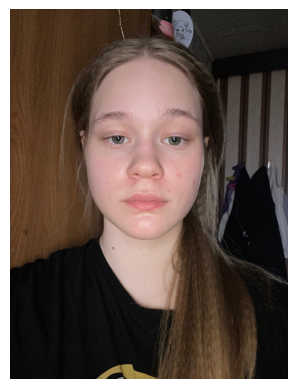

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import numpy as np

# Učitava se model za detekciju godina
model = load_model('age_detection_model.h5')

# Putanja do testne slike
test_image_path = 'dataset/test/18-20/27.jpg'

# Učitavanje i obrađivanje
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

#Predikcija godina
predictions = model.predict(img)

#Interpretacija rezultata
predicted_age = np.argmax(predictions) + 18 # Dodaje se 18 jer je model obučen na uzorku koji pokriva opseg od 18 do 60 god

print(f"Predicted Age: {predicted_age}")

#Prikaz rezultata
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
train_files = os.listdir('dataset/train')
print("Files in train:", train_files)
validation_files = os.listdir('dataset/test')
print("Files in validation:", validation_files)

Files in train: ['21-30', '41-50', '18-20', '31-40', '51-60']
Files in validation: ['21-30', '41-50', '18-20', '31-40', '51-60']


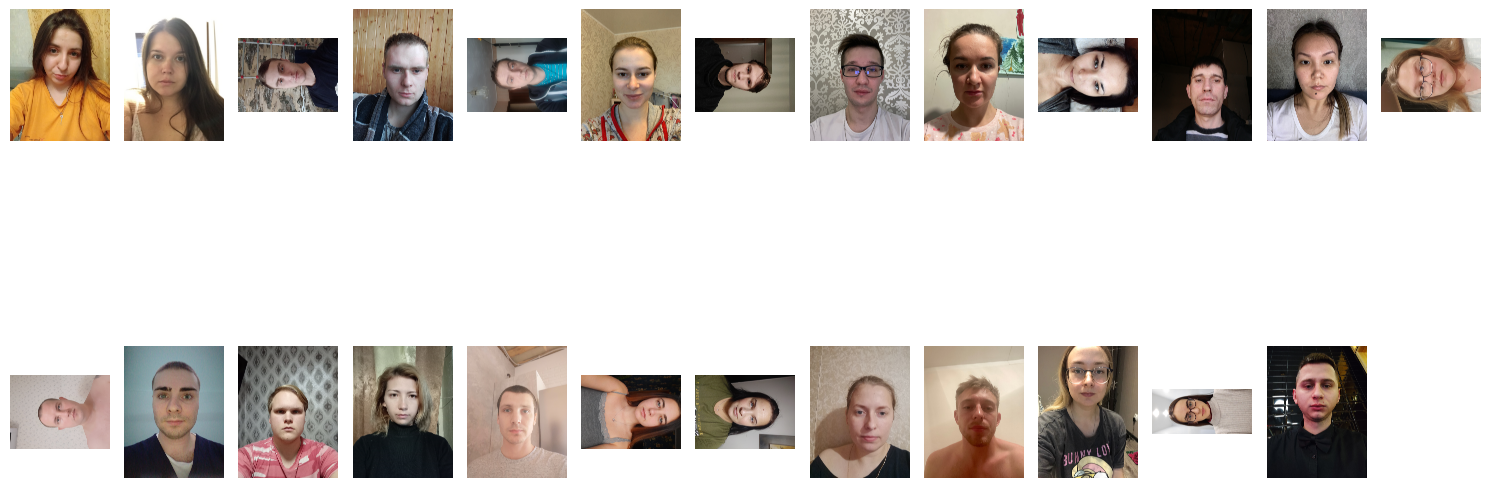

In [ ]:
import matplotlib.pyplot as plt
import os

folder_path = 'dataset/train/21-30'

if os.path.exists(folder_path):

    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


    num_images = len(image_files)
    num_rows = 2
    num_cols = (num_images + num_rows - 1) // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))


    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = plt.imread(image_path)


        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(image)
        axes[row, col].axis('off')


    for ax in axes.flat[num_images:]:
        ax.axis('off')
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("Folder ne postoji.")

# **Primena modela**

25-09-25 19:17:31 - Directory /root/.deepface has been created
25-09-25 19:17:31 - Directory /root/.deepface/weights has been created
Detected faces: 1


Action: gender:   0%|          | 0/3 [00:00<?, ?it/s] 

25-09-25 19:17:53 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 524k/537M [00:00<03:11, 2.80MB/s]
  0%|          | 2.10M/537M [00:00<01:05, 8.21MB/s]
  1%|▏         | 6.82M/537M [00:00<00:23, 22.9MB/s]
  2%|▏         | 11.0M/537M [00:00<00:27, 19.4MB/s]
  3%|▎         | 17.8M/537M [00:00<00:16, 30.9MB/s]
  4%|▍         | 22.0M/537M [00:00<00:18, 27.5MB/s]
  6%|▌         | 29.9M/537M [00:01<00:13, 38.7MB/s]
  6%|▋         | 34.6M/537M [00:01<00:14, 34.8MB/s]
  8%|▊         | 40.9M/537M [00:01<00:12, 41.2MB/s]
  8%|▊         | 45.6M/537M [00:01<00:16, 30.7MB/s]
 10%|▉         | 53.0M/537M [00:01<00:14, 32.4MB/s]
 11%|█         | 57.1M/537M [00:01<00:17, 28.2MB/s]
 12%|█▏        | 63.4M/537M [00:02<00:17, 26.6MB/s]
 13%|█▎        | 70.3M/537M [00:02<00:14, 33.1MB/s]
 14%|█▍        | 74.4M/537M [00:02<00:14, 31.5MB/s]
 15%|█▍      

25-09-25 19:18:22 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  0%|          | 524k/539M [00:00<03:29, 2.57MB/s]
  0%|          | 2.10M/539M [00:00<01:11, 7.49MB/s]
  1%|▏         | 7.86M/539M [00:00<00:21, 24.9MB/s]
  2%|▏         | 11.0M/539M [00:00<00:27, 19.5MB/s]
  4%|▎         | 18.9M/539M [00:00<00:15, 33.0MB/s]
  4%|▍         | 23.1M/539M [00:00<00:19, 26.0MB/s]
  5%|▍         | 26.7M/539M [00:01<00:21, 23.9MB/s]
  6%|▌         | 29.9M/539M [00:01<00:20, 24.6MB/s]
  6%|▌         | 33.0M/539M [00:01<00:27, 18.3MB/s]
  7%|▋         | 39.8M/539M [00:01<00:18, 26.6MB/s]
  8%|▊         | 43.5M/539M [00:02<00:34, 14.2MB/s]
  9%|▉         | 49.8M/539M [00:02<00:24, 19.9MB/s]
 10%|▉         | 53.5M/539M [00:02<00:24, 19.9MB/s]
 11%|█         | 58.2M/539M [00:02<00:20, 23.8MB/s]
 12%|█▏        | 63.4M/539M [00:02<00:18, 25.4MB/s]
 13%|█▎        | 69

25-09-25 19:18:43 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
  9%|▉         | 524k/5.98M [00:00<00:01, 2.91MB/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 16.2MB/s]
Action: emotion: 100%|██████████| 3/3 [00:54<00:00, 18.33s/it]


Results: [{'gender': {'Woman': np.float32(99.89803), 'Man': np.float32(0.10196704)}, 'dominant_gender': 'Woman', 'region': {'x': 445, 'y': 458, 'w': 1175, 'h': 1175, 'left_eye': (1224, 907), 'right_eye': (768, 921)}, 'face_confidence': 0.93, 'age': 29, 'emotion': {'angry': np.float32(0.004452295), 'disgust': np.float32(2.9180888e-10), 'fear': np.float32(0.04515063), 'happy': np.float32(3.7943868e-05), 'sad': np.float32(0.4869802), 'surprise': np.float32(0.0008796804), 'neutral': np.float32(99.4625)}, 'dominant_emotion': 'neutral'}]


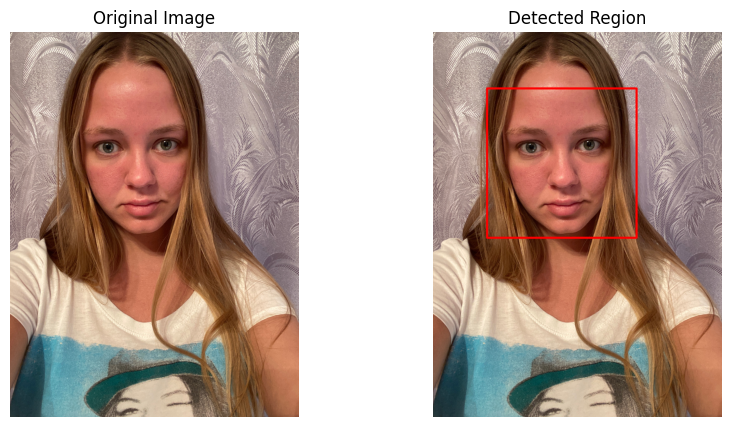

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Putanja do slike koja se testira
image_path = 'dataset/test/18-20/25.jpg'

#Učitavanje
original_img = cv2.imread(image_path)
img_with_region = original_img.copy()

# Detektovanje lica u slici korišćenjem OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_with_region, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

#Broj detektovanih lica
print("Detected faces:", len(faces))

#Izdvajamo info o polu, godinama i emocijama
results = DeepFace.analyze(image_path, actions=["gender", "age", "emotion"])
print("Results:", results)

if len(faces) > 0:

    region = {'x': faces[0][0], 'y': faces[0][1], 'w': faces[0][2], 'h': faces[0][3]}


    x, y, w, h = region['x'], region['y'], region['w'], region['h']
    cv2.rectangle(img_with_region, (x, y), (x + w, y + h), (0, 0, 255), 16)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(cv2.cvtColor(img_with_region, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title('Detected Region')

plt.show()

U prethodnom primeru testirana je jedna slika, a sada će biti testiran ceo direktorijum

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


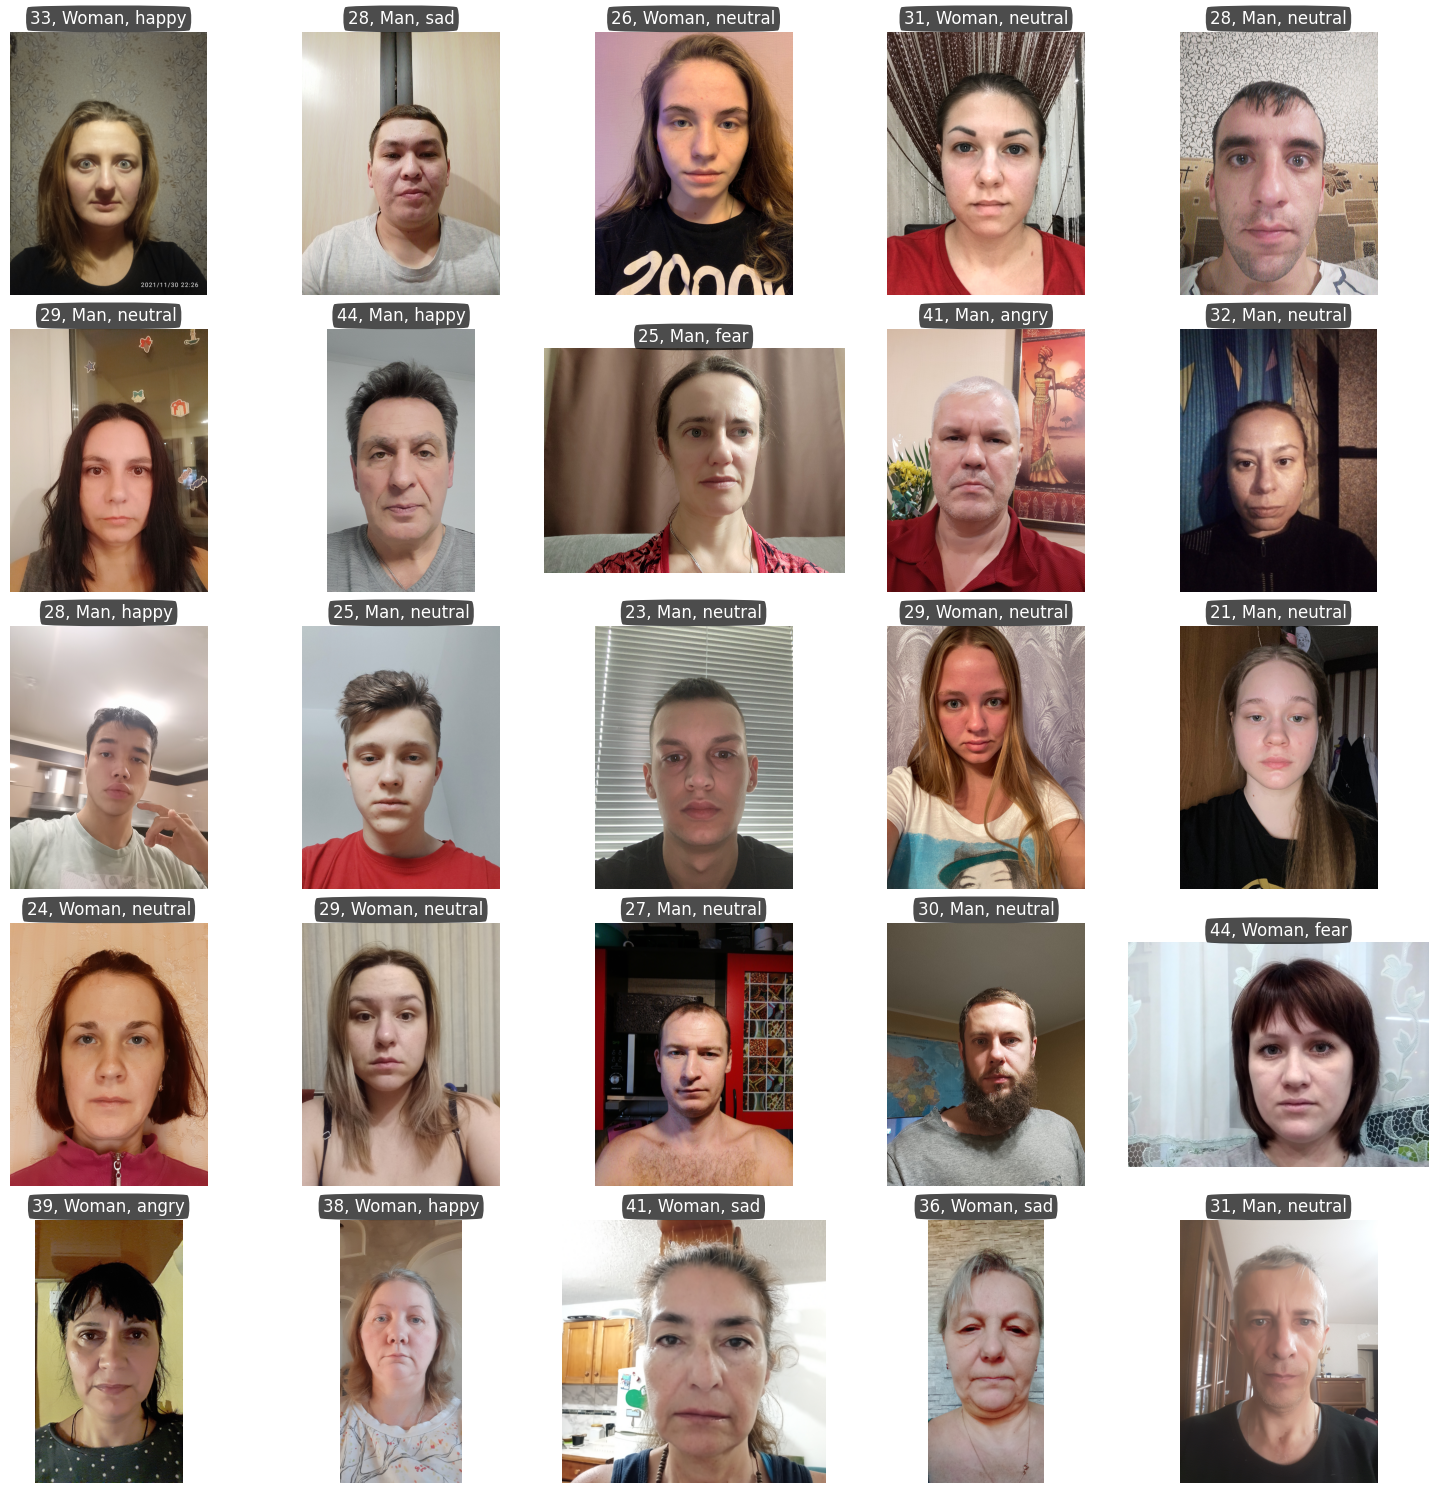

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import gc
from glob import glob

image_files = glob('dataset/test/**/*.jpg', recursive=True)

num_columns = 5
num_rows = 5
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

max_images = num_columns * num_rows

j = 0

for img_file in image_files:
    if j >= max_images:
        break

    try:

        img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (224, 224))

        result = DeepFace.analyze(img_path=img_resized, actions=['age', 'emotion', 'gender'], enforce_detection=False)

        if isinstance(result, list):
            result = result[0]

        predicted_gender = result.get('dominant_gender', 'N/A')
        predicted_age = result.get('age', 'N/A')
        predicted_emotion = result.get('dominant_emotion', 'N/A')

        label = "{}, {}, {}".format(predicted_age, predicted_gender, predicted_emotion)

        text_x = j // num_columns
        text_y = j % num_columns

        axes[text_x, text_y].imshow(img)
        axes[text_x, text_y].text(
            0.5, 1.05, label, fontsize=12, color='white',
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round4'),
            transform=axes[text_x, text_y].transAxes, ha='center', va='center'
        )
        axes[text_x, text_y].axis('off')

        j += 1

    except Exception as e:
        print(f"Greška pri obradi slike {img_file}: {e}")

    finally:
        gc.collect()

for i in range(j, num_columns * num_rows):
    text_x = i // num_columns
    text_y = i % num_columns
    axes[text_x, text_y].axis('off')

plt.tight_layout()
plt.show()

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]



Dominant Gender: Man
Predicted Age: 26
Dominant Emotion: neutral


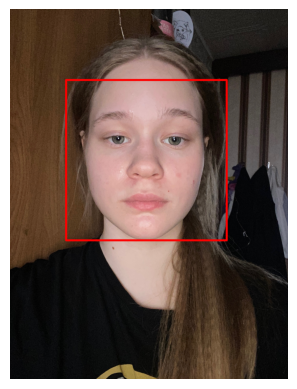

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = 'dataset/test/18-20/27.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 16)

plt.imshow(img)
plt.axis('off')
plt.show()


Action: gender: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]



Dominant Gender: Woman
Predicted Age: 26
Dominant Emotion: neutral


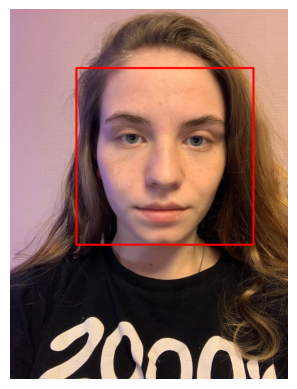

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = 'dataset/test/21-30/29.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 16)

plt.imshow(img)
plt.axis('off')
plt.show()

Komparacija modela kreiranog na početku (koji određuje godine na osnovu slika) i DeepFace-a

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


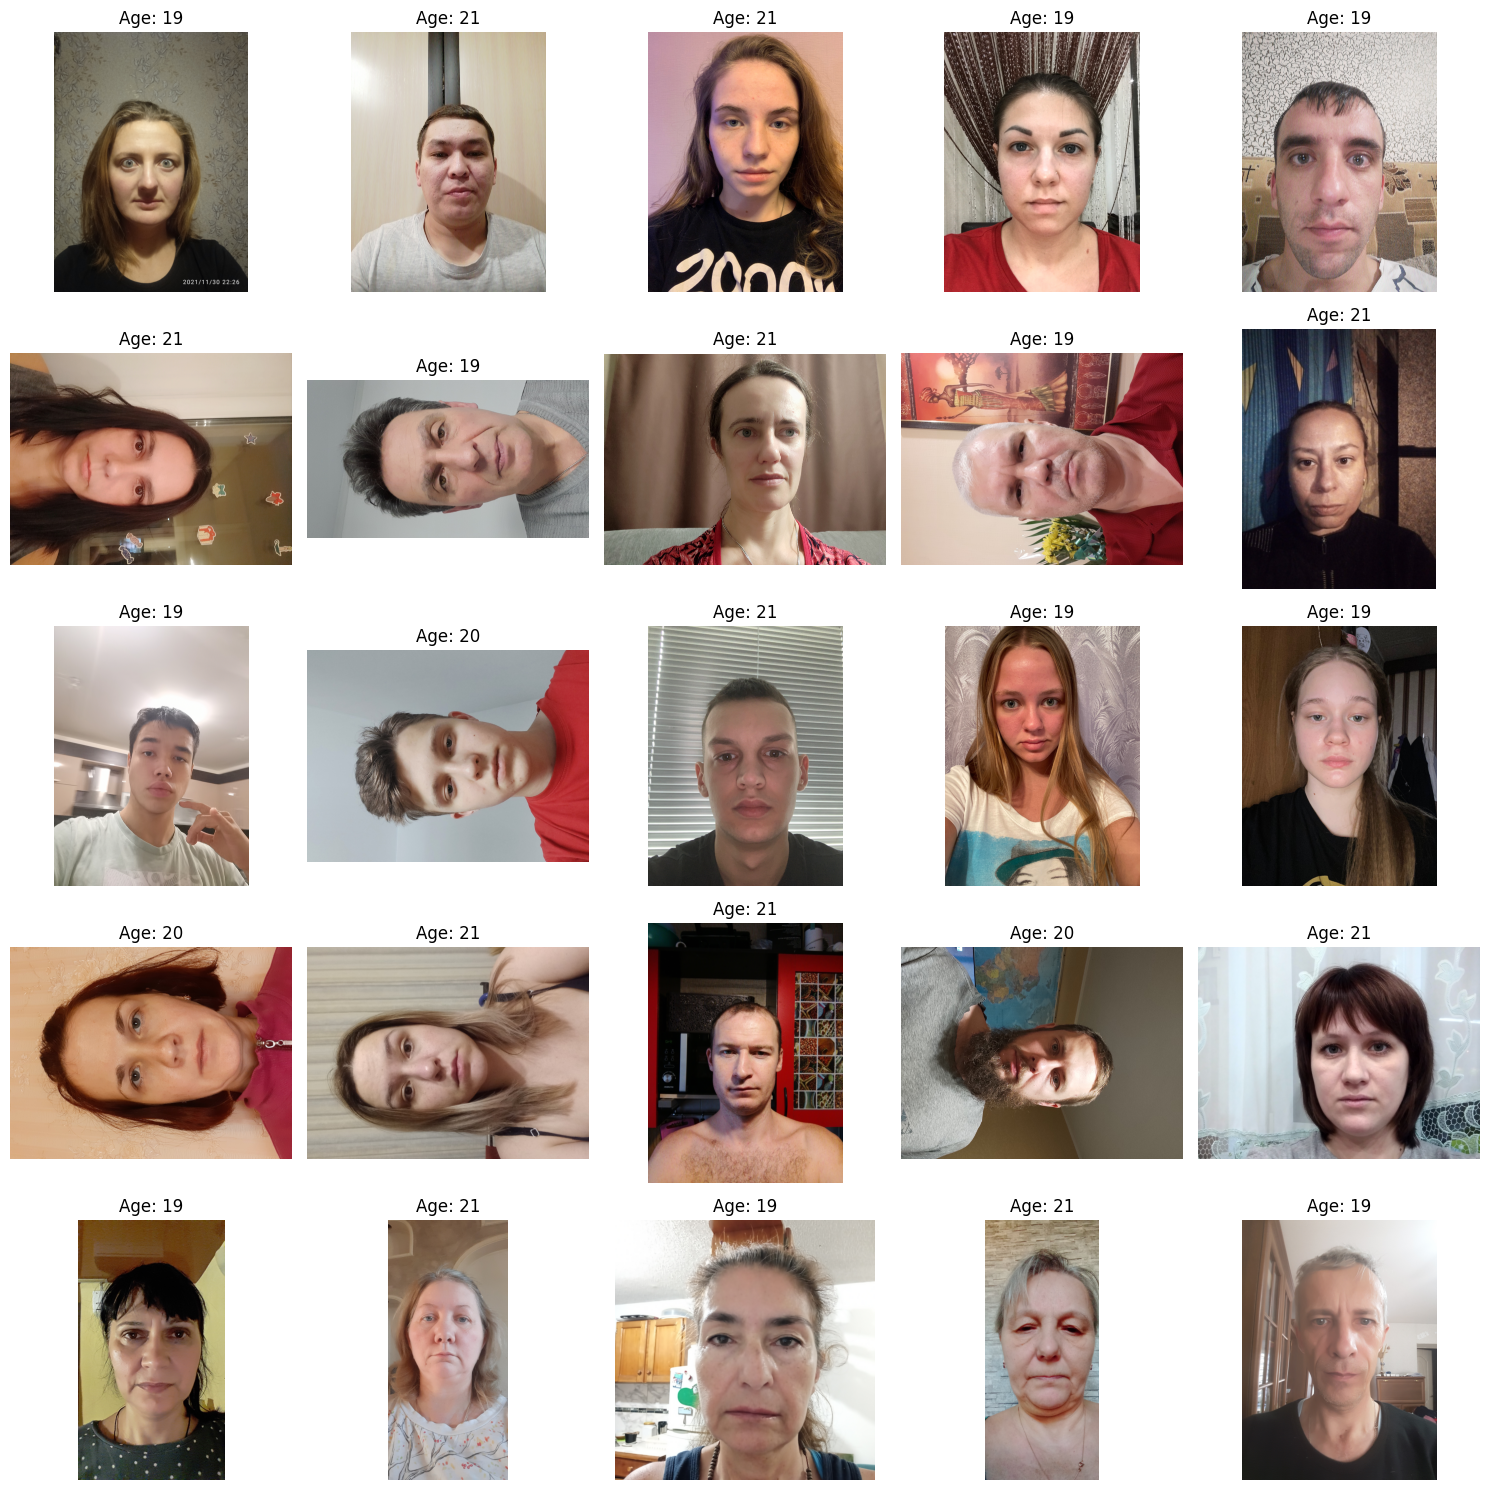

In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

age_model = load_model('age_detection_model.h5')

image_files = glob('dataset/test/**/*.jpg', recursive=True)

num_images = len(image_files)
num_columns = 5
num_rows = 5
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

for j, img_file in enumerate(image_files):

    img = load_img(img_file, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    predictions = age_model.predict(img)
    predicted_age = np.argmax(predictions[0]) + 18

    axes[j // num_columns, j % num_columns].imshow(load_img(img_file))
    axes[j // num_columns, j % num_columns].set_title(f'Age: {predicted_age}')
    axes[j // num_columns, j % num_columns].axis('off')

plt.tight_layout()
plt.show()


Model ima znatno veći broj grešaka nego DeepFace. Ono što je veoma primetno jeste da model koristi samo raspon 18-22

Komparacija **preciznosti**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Učitaj model
model = load_model('age_detection_model.h5')

# Priprema test podataka
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
   'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluacija
eval_result = model.evaluate(test_generator)

accuracy = eval_result[1]

print(f'Accuracy: {accuracy * 100:.2f}%')

Found 25 images belonging to 5 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.2400 - loss: 1.5848
Accuracy: 24.00%


In [ ]:
import os
import gc
from glob import glob
import cv2
from deepface import DeepFace

test_dir = 'dataset/test'

correct_predictions = 0
total_images = 0

for image_file in glob('dataset/test/**/*.jpg', recursive=True):
    try:

        img = cv2.imread(image_file)
        img_resized = cv2.resize(img, (640, 640))

        results = DeepFace.analyze(img_resized, actions=['age'], enforce_detection=False)

        predicted_age = results[0]['age']

        actual_age_range = os.path.basename(os.path.dirname(image_file))
        actual_age_range = actual_age_range.split('-')
        actual_min_age = int(actual_age_range[0])
        actual_max_age = int(actual_age_range[1])

        if actual_min_age <= predicted_age <= actual_max_age:
            correct_predictions += 1

        total_images += 1

        del img, img_resized, results
        gc.collect()

    except Exception as e:
        print(f"Greška pri obradi slike {image_file}: {e}")

accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0

print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 32.00%


# **ZAKLJUČAK**

Na osnovu evaluacije performansi modela za procenu starosne dobi, može se konstatovati da trenutno korišćeni algoritam ne dostigne željeni nivo tačnosti, ukazujući na potrebu za njegovim daljim unapređivanjem. Osnovni nedostaci i preporuke za poboljšanje mogu se sagledati kroz sledeće aspekte:

**Neoptimalne performanse modela**:
Postižu se nedovoljno precizni rezultati pri klasifikaciji osoba u odgovarajuće starosne grupe na osnovu slika. Ovakvo stanje može proizaći iz više faktora, poput nedovoljno obuhvatnog skupa podataka korišćenih za obuku, suboptimalne arhitekture modela ili neadekvantnih metrika za evaluaciju.

**Ograničenja trening podataka:**
Skup podataka na kojem je model obučen verovatno ne sadrži dovoljno reprezentativnih primeraka iz svih relevantnih starosnih kategorija, niti dovoljnu raznolikost u pogledu demografskih karakteristika i uslova snimanja. Ovo ograničava modelovu sposobnost da donosi precizne predikcije na novim, neviđenim podacima.

**Nedostatak robustnosti:**
Model pokazuje smanjenu sposobnost generalizacije, odnosno teškoće prilikom donošenja tačnih predikcija na slikama koje se razlikuju od onih korišćenih u trening skupu.

# **Smernice za unapređenje:**
Za poboljšanje performansi preporučuje se proširenje trening skupa podataka, primena naprednijih tehnika obrade slike, eksperimentisanje sa kompleksnijim modelima neuronskih mreža, kao i pažljivije podešavanje hiperparametara prilagođenih specifičnosti zadatka.